In [1]:
from eaaw_graphlime_utils import *
import gc

import seaborn as sns
import seaborn.objects as so


from   pcgrad.pcgrad import PCGrad # from the following: https://github.com/WeiChengTseng/Pytorch-PCGrad. Renamed to 'pcgrad' and moved to site-packages folder.

import pandas as pd

# torch.manual_seed(2)

ScalarFunction


In [2]:
dataset_name='computers'
if dataset_attributes[dataset_name]['single_or_multi_graph']=='single':
    dataset = prep_data(dataset_name=dataset_name, location='default', batch_size='default', transform_list='default',
                        train_val_test_split=[0.9,0.05,0.05])
    graph_to_watermark = data = dataset[0]
elif dataset_attributes[dataset_name]['single_or_multi_graph']=='multi':
    [train_dataset, val_dataset, test_dataset], [train_loader, val_loader, test_loader] = prep_data(dataset_name=dataset_name, location='default', 
                                                                                                    batch_size='default', transform_list='default',
                                                                                                                            train_val_test_split=[0.9,0.05,0.05])
    graph_to_watermark = train_dataset[0]

class: <class 'torch_geometric.datasets.amazon.Amazon'>
Transorms used when loading computers: ['CreateMaskTransform()']
train_mask: 12376
test_mask: 689
val_mask: 687


In [3]:
#optimization_kwargs, node_classifier_kwargs, watermark_kwargs, subgraph_kwargs, augment_kwargs, watermark_loss_kwargs, regression_kwargs = get_presets(dataset, 'default')
get_presets(dataset,dataset_name)

compare_unimportant_against_random=False

config.node_classifier_kwargs['dropout']=0.1
config.node_classifier_kwargs['dropout_subgraphs']=0
config.watermark_kwargs['unimportant_selection_kwargs']['clf_only_epochs'] = 20
config.optimization_kwargs['lr']=0.001
config.optimization_kwargs['epochs']=70
# config.optimization_kwargs['coefWmk']=300
config.optimization_kwargs['perturb_x']=False
config.optimization_kwargs['perturb_lr']=1e5

config.optimization_kwargs['coefWmk_kwargs']= {
                                                'coefWmk':50,
                                                'schedule_coef_wmk': False,
                                                'min_coefWmk_scheduled': 100,
                                                'reach_max_coef_wmk_by_epoch':70,
                                                }

config.optimization_kwargs['use_pcgrad']=True
config.optimization_kwargs['use_sam']=False
config.optimization_kwargs['sam_momentum']=0.5
config.optimization_kwargs['sam_rho']=1e-5

config.optimization_kwargs['penalize_similar_subgraphs']=True
config.optimization_kwargs['p_swap']=0.5
config.optimization_kwargs['shifted_subgraph_loss_coef']=1e-1


config.optimization_kwargs['use_gradnorm']=False


config.augment_kwargs['p']=0.3
config.augment_kwargs['nodeDrop']['use']=True
config.augment_kwargs['nodeDrop']['p']=0.1
config.augment_kwargs['nodeMixUp']['use']=True
config.augment_kwargs['nodeMixUp']['lambda']=5
config.augment_kwargs['nodeFeatMask']['use']=False
config.augment_kwargs['edgeDrop']['use']=True
config.augment_kwargs['edgeDrop']['p']=0.1

config.augment_kwargs['separate_trainset_from_subgraphs'] = True
config.augment_kwargs['ignore_subgraphs'] = True
config.watermark_kwargs['percent_of_features_to_watermark']=3
config.watermark_kwargs['watermark_type']='most_represented'
config.subgraph_kwargs['numSubgraphs']=7
config.subgraph_kwargs['fraction']=0.03
config.subgraph_kwargs['method']='random'
config.optimization_kwargs['sacrifice_kwargs']['method']='subgraph_node_indices'
config.optimization_kwargs['sacrifice_kwargs']['percentage']=1
config.optimization_kwargs['separate_forward_passes_per_subgraph']=False
config.optimization_kwargs['clf_only']=False
config.watermark_loss_kwargs['epsilon']=1e-1

config.regression_kwargs['lambda']=1e-3

validate_kwargs()


In [4]:
merged_dict = merge_kwargs_dicts()#config.node_classifier_kwargs, config.optimization_kwargs, config.watermark_kwargs, config.subgraph_kwargs, config.regression_kwargs, config.watermark_loss_kwargs, config.augment_kwargs)
merged_dict_keys = list(merged_dict.keys()) + ['Train Acc','Val Acc','Match Rates','Final Betas','watermark']
all_dfs = pd.DataFrame(dict(zip(merged_dict_keys,[]*len(merged_dict_keys))))
scale_beta_method=None
debug_multiple_subgraphs=False



lambda: 5
nodeIndices: [12513, 10559, 2698, 10078, 12522, 12121, 4380, 8303, 3762, 2375, 11804, 13087, 8958, 9083, 5096, 8188, 576, 4299, 7956, 7317, 3277, 7294, 8964, 6680, 5607, 11752, 6846, 10700, 141, 7772, 10542, 3232, 5453, 3228, 10784, 1937, 218, 2487, 6078, 6413, 3983, 5372, 8796, 707, 10887, 1023, 11514, 8063, 4373, 13200, 10759, 11872, 11463, 3021, 8861, 13403, 5949, 6059, 4150, 7969, 4498, 11369, 5999, 2120, 13571, 84, 2082, 12058, 9121, 116, 2166, 13122, 3686, 10529, 89, 4802, 6724, 1067, 12534, 13042, 5839, 4108, 10086, 11769, 4563, 7569, 7768, 12045, 6552, 1232, 4199, 10292, 10537, 10412, 6158, 3549, 1150, 12436, 11391, 2341, 6459, 9321, 7985, 12339, 6231, 8606, 2310, 6835, 6879, 7282, 2262, 4079, 5030, 3529, 13487, 7362, 9287, 8173, 9971, 5847, 7135, 3338, 6992, 9881, 11230, 3353, 3327, 5808, 8634, 9267, 11477, 3601, 5010, 1922, 10535, 418, 11550, 11758, 3024, 8361, 711, 6444, 913, 9198, 2231, 10999, 7568, 9146, 3158, 12521, 6091, 4991, 11193, 4921, 6536, 6387, 1910, 137

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 23
most_represented_indices: tensor([414, 558,  73, 521, 532, 580, 404,  61, 663, 586, 501, 292,  52, 651,
        537, 240, 689, 215, 731, 624, 101,   6, 169])
watermarks: [tensor([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       

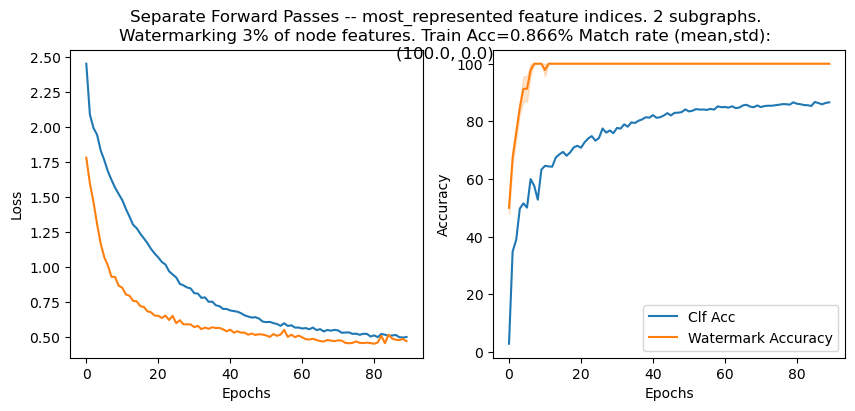



lambda: 5
nodeIndices: [6470, 9003, 8793, 9076, 7372, 5843, 10541, 6080, 5731, 4180, 7836, 4782, 11615, 4130, 5709, 4451, 4194, 2576, 6417, 5606, 7694, 5756, 10120, 2232, 7337, 6662, 9271, 13283, 7338, 12968, 1063, 11655, 5663, 10051, 8807, 7214, 9702, 1059, 203, 529, 11495, 3851, 3350, 7153, 12921, 107, 5090, 270, 2631, 1584, 12562, 79, 8270, 2972, 56, 1774, 12878, 5045, 4298, 4108, 3445, 11255, 10721, 8936, 13666, 5074, 3499, 8888, 6434, 173, 2979, 335, 9319, 9864]
nodeIndices: [6390, 3754, 7380, 11137, 6519, 4310, 8083, 2971, 12167, 12802, 7216, 3599, 12083, 5423, 6846, 2231, 11832, 8498, 7698, 5359, 11180, 80, 3382, 13273, 321, 3912, 12087, 11356, 12237, 8100, 5861, 12980, 1205, 13475, 9140, 11050, 3427, 10893, 1710, 6135, 2935, 6094, 4088, 3050, 2160, 9337, 2686, 9559, 3339, 8219, 7204, 2406, 10111, 9698, 11318, 9765, 12109, 2927, 10973, 8900, 12812, 12749, 10315, 962, 7258, 1870, 7154, 12646, 3107, 6408, 9637, 6276, 126, 6246]
nodeIndices: [10982, 877, 8850, 6087, 3910, 9772, 9

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 23
most_represented_indices: tensor([101, 663, 357, 558, 487, 202, 291, 501, 532, 292, 734, 689, 580, 392,
        741, 631,  54, 404, 738, 675, 521, 414,  61])
watermarks: [tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       

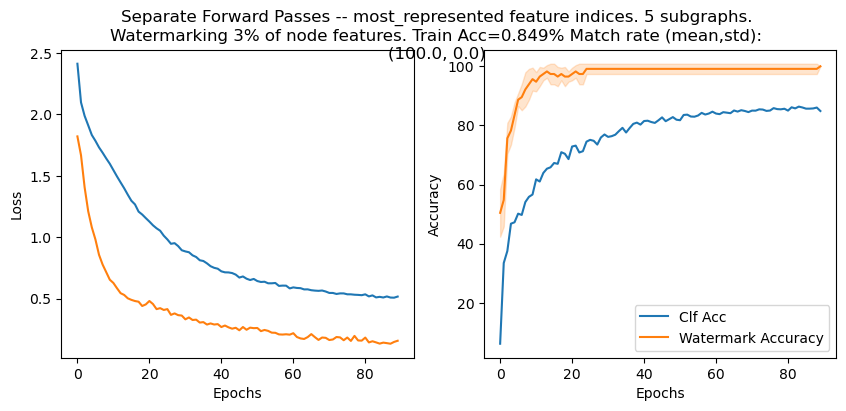



lambda: 5
nodeIndices: [4840, 12990, 5605, 2947, 7244, 13084, 13533, 3560, 8802, 5676, 10529, 4105, 4041, 3478, 9270, 10914, 5986, 7369, 2988, 8739, 1395, 7939, 11108, 7280, 794, 6976, 3923, 3604, 4980, 10395, 11014, 1920, 540, 13467, 10564, 12500, 10716]
nodeIndices: [12895, 12750, 10672, 7185, 21, 313, 8714, 2772, 7417, 2704, 10626, 4588, 3519, 5597, 1989, 8809, 10808, 11645, 1969, 7263, 8410, 6873, 12925, 7553, 2207, 13457, 9684, 1440, 3783, 6571, 1409, 3516, 788, 11817, 8687, 254, 12479]
nodeIndices: [524, 12710, 13226, 3627, 2465, 11258, 7152, 2970, 10030, 10470, 13717, 8702, 9915, 9302, 6990, 3014, 1245, 6120, 4420, 12247, 5853, 8411, 12765, 5812, 1841, 10003, 4402, 9185, 4453, 13004, 10460, 2571, 2067, 7120, 7681, 7157, 9410]
nodeIndices: [5426, 945, 10798, 4430, 12660, 12173, 10542, 8293, 8174, 8097, 13423, 8922, 8204, 4643, 5007, 7042, 3933, 5199, 8217, 8925, 13379, 8990, 6671, 1848, 9579, 11829, 582, 6874, 267, 439, 6144, 11897, 3397, 11611, 6720, 1048, 3323]
nodeIndices: [

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 23
most_represented_indices: tensor([580, 501, 414, 487,  52, 537, 292, 101, 651, 731, 291, 613, 689, 663,
        521, 404, 532, 357, 387, 376, 215, 631, 461])
watermarks: [tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       

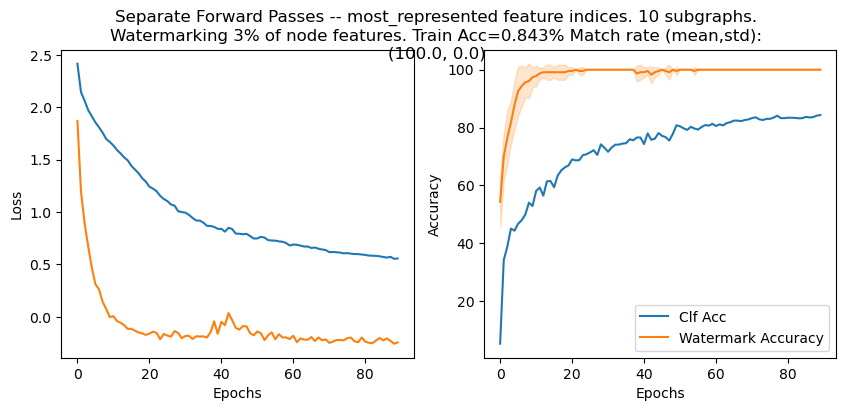



lambda: 5
nodeIndices: [12513, 10559, 2698, 10078, 12522, 12121, 4380, 8303, 3762, 2375, 11804, 13087, 8958, 9083, 5096, 8188, 576, 4299, 7956, 7317, 3277, 7294, 8964, 6680, 5607, 11752, 6846, 10700, 141, 7772, 10542, 3232, 5453, 3228, 10784, 1937, 218, 2487, 6078, 6413, 3983, 5372, 8796, 707, 10887, 1023, 11514, 8063, 4373, 13200, 10759, 11872, 11463, 3021, 8861, 13403, 5949, 6059, 4150, 7969, 4498, 11369, 5999, 2120, 13571, 84, 2082, 12058, 9121, 116, 2166, 13122, 3686, 10529, 89, 4802, 6724, 1067, 12534, 13042, 5839, 4108, 10086, 11769, 4563, 7569, 7768, 12045, 6552, 1232, 4199, 10292, 10537, 10412, 6158, 3549, 1150, 12436, 11391, 2341, 6459, 9321, 7985, 12339, 6231, 8606, 2310, 6835, 6879, 7282, 2262, 4079, 5030, 3529, 13487, 7362, 9287, 8173, 9971, 5847, 7135, 3338, 6992, 9881, 11230, 3353, 3327, 5808, 8634, 9267, 11477, 3601, 5010, 1922, 10535, 418, 11550, 11758, 3024, 8361, 711, 6444, 913, 9198, 2231, 10999, 7568, 9146, 3158, 12521, 6091, 4991, 11193, 4921, 6536, 6387, 1910, 1

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 76
most_represented_indices: tensor([414, 558,  73, 521, 532, 580, 404,  61, 663, 586, 501, 292,  52, 651,
        537, 240, 689, 215, 731, 624, 101,   6, 169, 494, 202,  54, 572, 333,
        376, 387, 291, 741, 314, 487, 613, 631, 488, 385, 347, 534, 258, 523,
         65, 357, 675, 752, 713, 710, 225, 460, 682, 467, 608, 392, 734, 721,
        711, 738, 484, 381, 623, 219, 461,  29, 673, 692,  91, 583, 736, 296,
        349, 449, 153, 705, 148, 416])
watermarks: [tensor([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,

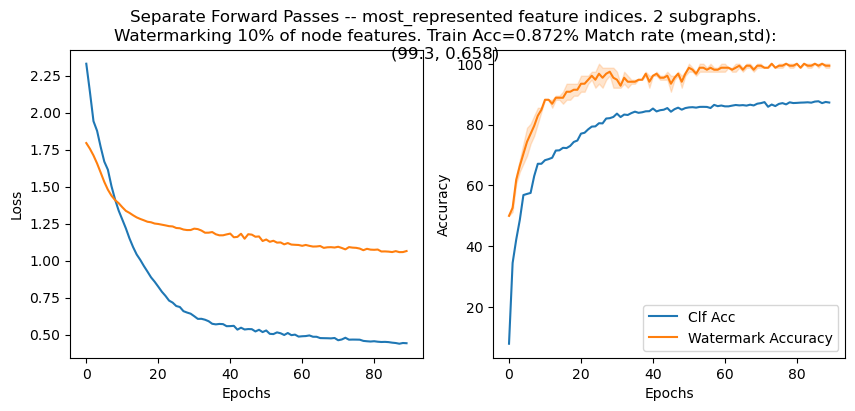



lambda: 5
nodeIndices: [6470, 9003, 8793, 9076, 7372, 5843, 10541, 6080, 5731, 4180, 7836, 4782, 11615, 4130, 5709, 4451, 4194, 2576, 6417, 5606, 7694, 5756, 10120, 2232, 7337, 6662, 9271, 13283, 7338, 12968, 1063, 11655, 5663, 10051, 8807, 7214, 9702, 1059, 203, 529, 11495, 3851, 3350, 7153, 12921, 107, 5090, 270, 2631, 1584, 12562, 79, 8270, 2972, 56, 1774, 12878, 5045, 4298, 4108, 3445, 11255, 10721, 8936, 13666, 5074, 3499, 8888, 6434, 173, 2979, 335, 9319, 9864]
nodeIndices: [6390, 3754, 7380, 11137, 6519, 4310, 8083, 2971, 12167, 12802, 7216, 3599, 12083, 5423, 6846, 2231, 11832, 8498, 7698, 5359, 11180, 80, 3382, 13273, 321, 3912, 12087, 11356, 12237, 8100, 5861, 12980, 1205, 13475, 9140, 11050, 3427, 10893, 1710, 6135, 2935, 6094, 4088, 3050, 2160, 9337, 2686, 9559, 3339, 8219, 7204, 2406, 10111, 9698, 11318, 9765, 12109, 2927, 10973, 8900, 12812, 12749, 10315, 962, 7258, 1870, 7154, 12646, 3107, 6408, 9637, 6276, 126, 6246]
nodeIndices: [10982, 877, 8850, 6087, 3910, 9772, 9

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 76
most_represented_indices: tensor([101, 663, 357, 558, 487, 202, 291, 501, 532, 292, 734, 689, 580, 392,
        741, 631,  54, 404, 738, 675, 521, 414,  61, 494,   6, 460,  52,  73,
         91, 537, 376,  65, 721, 613, 349, 752, 169, 692, 258, 572, 347, 467,
        624, 387, 586, 651, 333, 314, 225, 713,  29, 534, 459, 710, 472, 215,
        302, 299, 153, 583, 711, 461, 358, 682, 731, 148, 673, 705, 488,  28,
        209, 449, 508, 296, 240,  18])
watermarks: [tensor([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,

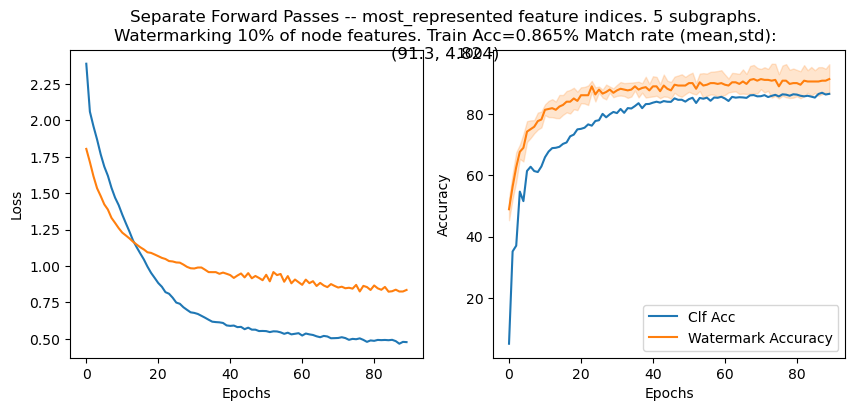



lambda: 5
nodeIndices: [4840, 12990, 5605, 2947, 7244, 13084, 13533, 3560, 8802, 5676, 10529, 4105, 4041, 3478, 9270, 10914, 5986, 7369, 2988, 8739, 1395, 7939, 11108, 7280, 794, 6976, 3923, 3604, 4980, 10395, 11014, 1920, 540, 13467, 10564, 12500, 10716]
nodeIndices: [12895, 12750, 10672, 7185, 21, 313, 8714, 2772, 7417, 2704, 10626, 4588, 3519, 5597, 1989, 8809, 10808, 11645, 1969, 7263, 8410, 6873, 12925, 7553, 2207, 13457, 9684, 1440, 3783, 6571, 1409, 3516, 788, 11817, 8687, 254, 12479]
nodeIndices: [524, 12710, 13226, 3627, 2465, 11258, 7152, 2970, 10030, 10470, 13717, 8702, 9915, 9302, 6990, 3014, 1245, 6120, 4420, 12247, 5853, 8411, 12765, 5812, 1841, 10003, 4402, 9185, 4453, 13004, 10460, 2571, 2067, 7120, 7681, 7157, 9410]
nodeIndices: [5426, 945, 10798, 4430, 12660, 12173, 10542, 8293, 8174, 8097, 13423, 8922, 8204, 4643, 5007, 7042, 3933, 5199, 8217, 8925, 13379, 8990, 6671, 1848, 9579, 11829, 582, 6874, 267, 439, 6144, 11897, 3397, 11611, 6720, 1048, 3323]
nodeIndices: [

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 76
most_represented_indices: tensor([580, 501, 414, 487,  52, 537, 292, 101, 651, 731, 291, 613, 689, 663,
        521, 404, 532, 357, 387, 376, 215, 631, 461, 572, 349, 558, 734, 333,
        449, 347,  65, 721,  73, 752, 682, 705, 675, 258, 460,   6, 692,  91,
         54,  61, 392, 169, 202, 586, 534, 624, 494,  29, 240, 523, 467, 738,
         28, 741, 711, 262, 314, 159, 583, 736, 385, 120, 416, 710, 411, 484,
         86, 507,  82, 671, 225, 623])
watermarks: [tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0., -1.,

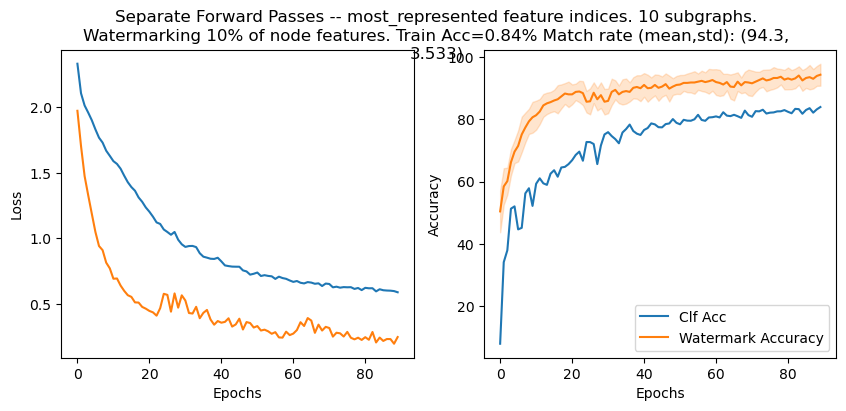



lambda: 5
nodeIndices: [12513, 10559, 2698, 10078, 12522, 12121, 4380, 8303, 3762, 2375, 11804, 13087, 8958, 9083, 5096, 8188, 576, 4299, 7956, 7317, 3277, 7294, 8964, 6680, 5607, 11752, 6846, 10700, 141, 7772, 10542, 3232, 5453, 3228, 10784, 1937, 218, 2487, 6078, 6413, 3983, 5372, 8796, 707, 10887, 1023, 11514, 8063, 4373, 13200, 10759, 11872, 11463, 3021, 8861, 13403, 5949, 6059, 4150, 7969, 4498, 11369, 5999, 2120, 13571, 84, 2082, 12058, 9121, 116, 2166, 13122, 3686, 10529, 89, 4802, 6724, 1067, 12534, 13042, 5839, 4108, 10086, 11769, 4563, 7569, 7768, 12045, 6552, 1232, 4199, 10292, 10537, 10412, 6158, 3549, 1150, 12436, 11391, 2341, 6459, 9321, 7985, 12339, 6231, 8606, 2310, 6835, 6879, 7282, 2262, 4079, 5030, 3529, 13487, 7362, 9287, 8173, 9971, 5847, 7135, 3338, 6992, 9881, 11230, 3353, 3327, 5808, 8634, 9267, 11477, 3601, 5010, 1922, 10535, 418, 11550, 11758, 3024, 8361, 711, 6444, 913, 9198, 2231, 10999, 7568, 9146, 3158, 12521, 6091, 4991, 11193, 4921, 6536, 6387, 1910, 1

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 383
most_represented_indices: tensor([414, 558,  73, 521, 532, 580, 404,  61, 663, 586, 501, 292,  52, 651,
        537, 240, 689, 215, 731, 624, 101,   6, 169, 494, 202,  54, 572, 333,
        376, 387, 291, 741, 314, 487, 613, 631, 488, 385, 347, 534, 258, 523,
         65, 357, 675, 752, 713, 710, 225, 460, 682, 467, 608, 392, 734, 721,
        711, 738, 484, 381, 623, 219, 461,  29, 673, 692,  91, 583, 736, 296,
        349, 449, 153, 705, 148, 416, 684, 452,  22, 763, 672, 562, 602, 439,
        403, 491, 508,  28, 507, 516, 209, 262, 158, 549, 589, 212, 632, 222,
        666,  49, 361, 151, 743, 358, 182, 646, 667, 407, 595,  46, 567, 459,
        140, 325, 420, 299, 155, 165, 141, 159, 369,  86, 591, 302, 528, 638,
        605, 239, 259, 120, 702, 348, 196, 163, 700, 135,  17, 506, 115, 411,
        671, 126, 598, 363,  74,  20, 630, 472, 574, 230,  12, 208, 674, 223,
        619, 350,  82,   4, 335, 252, 709, 184, 234, 592,  81, 410, 661, 

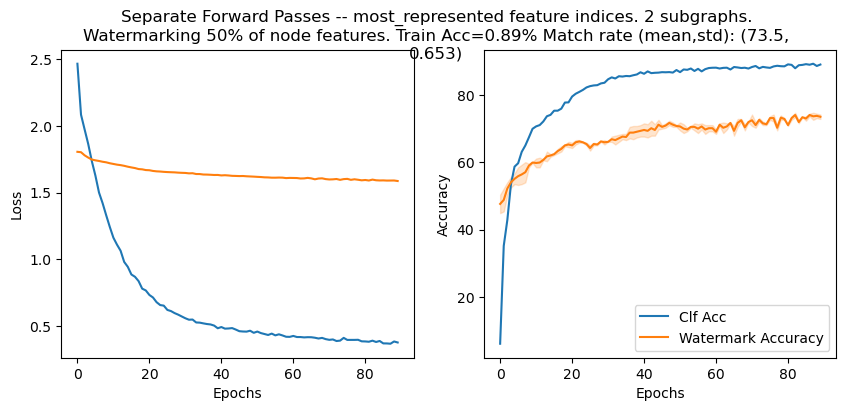



lambda: 5
nodeIndices: [6470, 9003, 8793, 9076, 7372, 5843, 10541, 6080, 5731, 4180, 7836, 4782, 11615, 4130, 5709, 4451, 4194, 2576, 6417, 5606, 7694, 5756, 10120, 2232, 7337, 6662, 9271, 13283, 7338, 12968, 1063, 11655, 5663, 10051, 8807, 7214, 9702, 1059, 203, 529, 11495, 3851, 3350, 7153, 12921, 107, 5090, 270, 2631, 1584, 12562, 79, 8270, 2972, 56, 1774, 12878, 5045, 4298, 4108, 3445, 11255, 10721, 8936, 13666, 5074, 3499, 8888, 6434, 173, 2979, 335, 9319, 9864]
nodeIndices: [6390, 3754, 7380, 11137, 6519, 4310, 8083, 2971, 12167, 12802, 7216, 3599, 12083, 5423, 6846, 2231, 11832, 8498, 7698, 5359, 11180, 80, 3382, 13273, 321, 3912, 12087, 11356, 12237, 8100, 5861, 12980, 1205, 13475, 9140, 11050, 3427, 10893, 1710, 6135, 2935, 6094, 4088, 3050, 2160, 9337, 2686, 9559, 3339, 8219, 7204, 2406, 10111, 9698, 11318, 9765, 12109, 2927, 10973, 8900, 12812, 12749, 10315, 962, 7258, 1870, 7154, 12646, 3107, 6408, 9637, 6276, 126, 6246]
nodeIndices: [10982, 877, 8850, 6087, 3910, 9772, 9

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 383
most_represented_indices: tensor([101, 663, 357, 558, 487, 202, 291, 501, 532, 292, 734, 689, 580, 392,
        741, 631,  54, 404, 738, 675, 521, 414,  61, 494,   6, 460,  52,  73,
         91, 537, 376,  65, 721, 613, 349, 752, 169, 692, 258, 572, 347, 467,
        624, 387, 586, 651, 333, 314, 225, 713,  29, 534, 459, 710, 472, 215,
        302, 299, 153, 583, 711, 461, 358, 682, 731, 148, 673, 705, 488,  28,
        209, 449, 508, 296, 240,  18, 452, 259, 416, 141, 623, 262, 439, 736,
        591, 608, 763, 666, 672,  49, 381, 562, 159, 335, 491, 484, 158, 598,
        234, 155, 646,  97,  86, 385, 165, 140,  17, 523, 135, 602, 743, 219,
        567, 528, 212, 506, 199, 516, 589, 363, 700, 407, 222,  22, 432, 361,
        605, 403, 507,  87, 420, 242, 569, 348,  74, 120, 719, 325, 671, 175,
        196, 684,  82, 239, 411, 233, 702, 674, 632,  15,  46, 595, 115, 350,
        226, 393, 151, 369, 133, 182, 353, 638,  20,  90, 163, 208,   8, 

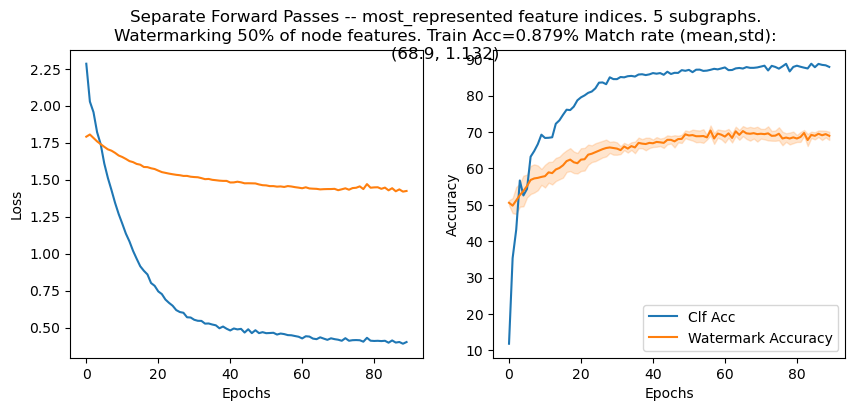



lambda: 5
nodeIndices: [4840, 12990, 5605, 2947, 7244, 13084, 13533, 3560, 8802, 5676, 10529, 4105, 4041, 3478, 9270, 10914, 5986, 7369, 2988, 8739, 1395, 7939, 11108, 7280, 794, 6976, 3923, 3604, 4980, 10395, 11014, 1920, 540, 13467, 10564, 12500, 10716]
nodeIndices: [12895, 12750, 10672, 7185, 21, 313, 8714, 2772, 7417, 2704, 10626, 4588, 3519, 5597, 1989, 8809, 10808, 11645, 1969, 7263, 8410, 6873, 12925, 7553, 2207, 13457, 9684, 1440, 3783, 6571, 1409, 3516, 788, 11817, 8687, 254, 12479]
nodeIndices: [524, 12710, 13226, 3627, 2465, 11258, 7152, 2970, 10030, 10470, 13717, 8702, 9915, 9302, 6990, 3014, 1245, 6120, 4420, 12247, 5853, 8411, 12765, 5812, 1841, 10003, 4402, 9185, 4453, 13004, 10460, 2571, 2067, 7120, 7681, 7157, 9410]
nodeIndices: [5426, 945, 10798, 4430, 12660, 12173, 10542, 8293, 8174, 8097, 13423, 8922, 8204, 4643, 5007, 7042, 3933, 5199, 8217, 8925, 13379, 8990, 6671, 1848, 9579, 11829, 582, 6874, 267, 439, 6144, 11897, 3397, 11611, 6720, 1048, 3323]
nodeIndices: [

  0%|          | 0/90 [00:00<?, ?it/s]

len sorted_indices: 767
len_watermark: 383
most_represented_indices: tensor([580, 501, 414, 487,  52, 537, 292, 101, 651, 731, 291, 613, 689, 663,
        521, 404, 532, 357, 387, 376, 215, 631, 461, 572, 349, 558, 734, 333,
        449, 347,  65, 721,  73, 752, 682, 705, 675, 258, 460,   6, 692,  91,
         54,  61, 392, 169, 202, 586, 534, 624, 494,  29, 240, 523, 467, 738,
         28, 741, 711, 262, 314, 159, 583, 736, 385, 120, 416, 710, 411, 484,
         86, 507,  82, 671, 225, 623, 713, 158, 439,  74, 148, 528, 562, 182,
        452, 299, 459,  49, 488, 638, 506, 407, 763, 196, 598, 667,  22, 209,
        212, 155,  97, 163, 608, 296, 595, 403, 141, 589,  17, 348, 110, 135,
        684, 219, 222,  87, 358, 700, 153, 673, 602, 632, 325, 591, 361, 702,
        302, 743, 140, 381, 672, 432, 508, 646, 436, 569, 567, 574, 549, 666,
         18, 420, 126, 151,  20, 363, 208, 709, 369, 582, 472, 239, 226, 233,
        259, 165, 674,  21, 605, 187, 661,  46, 255, 410,   4, 695,  12, 

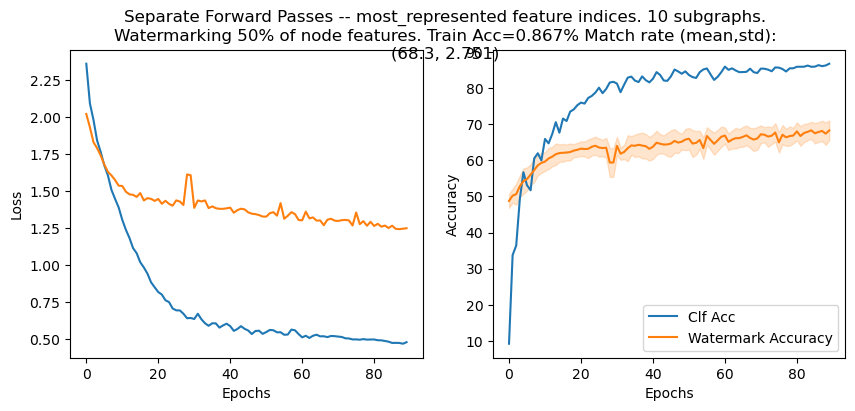

In [5]:
config.optimization_kwargs['separate_forward_passes_per_subgraph']=True
# for type_ in ['unimportant','most_represented']:
type_ = 'most_represented'
config.watermark_kwargs['watermark_type'] = type_
if type_ == 'unimportant':
    config.optimization_kwargs['coefWmk_kwargs']['coefWmk'] = 50
    config.optimization_kwargs['epochs'] = 70
else:
    config.optimization_kwargs['coefWmk_kwargs']['coefWmk'] = 20
    config.optimization_kwargs['epochs'] = 90
for perc in [3,10,50]:
    config.watermark_kwargs['percent_of_features_to_watermark']=perc
    for num_sub in [2,5,10]:
        config.subgraph_kwargs['numSubgraphs']=num_sub
        title_ = f'Separate Forward Passes -- {type_} feature indices'
        title = f'{title_}.\n{config.subgraph_kwargs['numSubgraphs']} subgraphs.\nWatermarking {config.watermark_kwargs['percent_of_features_to_watermark']}% of node features'
        Trainer_ = Trainer(data, dataset_name)
        node_classifier, history, subgraph_dict, \
        all_feature_importances, all_watermark_indices, probas = Trainer_.train(debug_multiple_subgraphs=False, save=True, print_every=1)

        primary_loss_curve, watermark_loss_curve, final_betas, watermarks, \
        percent_matches, percent_match_mean, percent_match_std, \
            primary_acc_curve, watermark_acc_curve, train_acc, val_acc = get_performance_trends(history, subgraph_dict)
        final_plot(history, title, percent_matches, primary_loss_curve, watermark_loss_curve, train_acc)  


In [ ]:
Trainer_.node_classifier.eval()
Trainer_.optimizer.zero_grad()
log_logits          = Trainer_.forward(data.x, data.edge_index, dropout=config.node_classifier_kwargs['dropout'])
acc_trn = accuracy(log_logits[Trainer_.train_mask], data.y[Trainer_.train_mask],verbose=False)
acc_val = accuracy(log_logits[Trainer_.val_mask],   data.y[Trainer_.val_mask],verbose=False)
print(acc_trn, acc_val)
Trainer_.node_classifier.eval()
Trainer_.optimizer.zero_grad()
log_logits          = Trainer_.forward(Trainer_.x, Trainer_.edge_index, dropout=config.node_classifier_kwargs['dropout'])
acc_trn = accuracy(log_logits[Trainer_.train_mask], Trainer_.y[Trainer_.train_mask],verbose=False)
acc_val = accuracy(log_logits[Trainer_.val_mask],   Trainer_.y[Trainer_.val_mask],verbose=False)
print(acc_trn, acc_val)

tensor(0.7551, dtype=torch.float64) tensor(0.7802, dtype=torch.float64)
tensor(0.8130, dtype=torch.float64) tensor(0.8195, dtype=torch.float64)


In [ ]:
def shift_subgraph(self, p_to_swap, subgraph_node_indices):
    num_to_swap = int(p_to_swap*len(subgraph_node_indices))
    random_indices = torch.randperm(len(subgraph_node_indices))
    subgraph_node_indices = subgraph_node_indices[random_indices[:len(subgraph_node_indices)-num_to_swap]]
    filtered_tensor = Trainer_.train_nodes_to_consider[~Trainer_.train_nodes_to_consider.unsqueeze(1).eq(subgraph_node_indices).any(dim=1)]
    random_index = torch.randint(0, filtered_tensor.size(0), (num_to_swap,))
    random_element = filtered_tensor[random_index]
    subgraph_node_indices = torch.concatenate([subgraph_node_indices, random_element])

    sub_edge_index, _ = subgraph(subgraph_node_indices, self.data.edge_index, relabel_nodes=True, num_nodes=self.data.num_nodes)
    shifted_subgraph = Data(
        x          = self.data.x[subgraph_node_indices]          if self.data.x is not None else None,
        edge_index = sub_edge_index,
        y          = self.data.y[subgraph_node_indices]          if self.data.y is not None else None,
        train_mask = self.data.train_mask[subgraph_node_indices] if self.data.train_mask is not None else None,
        test_mask  = self.data.test_mask[subgraph_node_indices]  if self.data.test_mask is not None else None,
        val_mask   = self.data.val_mask[subgraph_node_indices]   if self.data.val_mask is not None else None)
    return shifted_subgraph






In [ ]:
Trainer_.percent_matches

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

In [ ]:
Trainer_.node_classifier.eval()
Trainer_.optimizer.zero_grad()


log_logits   = Trainer_.forward(data.x, data.edge_index, dropout=0)
print('Full prediction accuracies:')
for i, sig in enumerate(Trainer_.subgraph_dict.keys()):
    node_indices = Trainer_.subgraph_dict[sig]['nodeIndices']
    these_out = log_logits[node_indices]
    these_y = data.y[node_indices]
    acc = accuracy(these_out, these_y, verbose=False)
    print(acc)
for p_to_swap in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]:
    matches = []
    sign_betas = []
    for i, sig in enumerate(Trainer_.subgraph_dict.keys()):
        node_indices = Trainer_.subgraph_dict[sig]['nodeIndices']
        num_to_swap = int(p_to_swap*len(node_indices))

        # print('node indices start:', node_indices)
        random_indices = torch.randperm(len(node_indices))
        node_indices = node_indices[random_indices[:len(node_indices)-num_to_swap]]
        filtered_tensor = Trainer_.train_nodes_to_consider[~Trainer_.train_nodes_to_consider.unsqueeze(1).eq(node_indices).any(dim=1)]
        random_index = torch.randint(0, filtered_tensor.size(0), (num_to_swap,))
        random_element = filtered_tensor[random_index]
        node_indices = torch.concatenate([node_indices, random_element])
        # print('node indices end  :', node_indices)

        sub_edge_index, _ = subgraph(node_indices, data.edge_index, relabel_nodes=True, num_nodes=data.num_nodes)
        subgraph_ = Data(
            x=data.x[node_indices] if data.x is not None else None,
            edge_index=sub_edge_index,
            y=data.y[node_indices] if data.y is not None else None,
            train_mask=data.train_mask[node_indices] if data.train_mask is not None else None,
            test_mask=data.test_mask[node_indices] if data.test_mask is not None else None,
            val_mask=data.val_mask[node_indices] if data.val_mask is not None else None)
    

        x_sub, edge_index_sub = subgraph_.x, subgraph_.edge_index
        these_log_logits   = Trainer_.forward(x_sub, edge_index_sub, dropout=config.node_classifier_kwargs['dropout'])
        these_probas = these_log_logits.clone().exp()
        y_sub = these_probas

        watermark_loss_kwargs = config.watermark_loss_kwargs
        regression_kwargs = config.regression_kwargs
        this_watermark = subgraph_dict[sig]['watermark']#[subgraph_dict[sig][k] for k in ['watermark','subgraph','nodeIndices']]


        ''' epoch condtion: epoch==epoch-1'''
        omit_indices,not_omit_indices = get_omit_indices(x_sub, this_watermark,ignore_zeros_from_subgraphs=False) #indices where watermark is 0
        this_raw_beta = solve_regression(x_sub, y_sub, regression_kwargs['lambda'])
        beta  = process_beta(this_raw_beta, watermark_loss_kwargs['alpha'], omit_indices, watermark_loss_kwargs['scale_beta_method'])
        these_watermark_indices = Trainer_.all_watermark_indices[i]
        #print('watermark:',this_watermark[these_watermark_indices])
        #print('beta:     ',torch.sign(beta[these_watermark_indices]))
        match = torch.sum(this_watermark[these_watermark_indices]==torch.sign(beta[these_watermark_indices]))/len(these_watermark_indices)
        sign_betas.append(torch.sign(beta[these_watermark_indices]))
        #match_str = str(np.round(100*match.item(),3)) + '%'
        matches.append(100*match.item())
    print(f'Replacing {int(100*p_to_swap)}% watermark subgraph indices:')
    print('watermark match rates:',np.mean(matches))
    bs = torch.vstack(sign_betas)
    match_counts= count_matches(bs)
    print('count of shared sign(beta) values across subgraphs:',match_counts)


Full prediction accuracies:
tensor(0.8491, dtype=torch.float64)
tensor(0.7925, dtype=torch.float64)
tensor(0.7358, dtype=torch.float64)
tensor(0.7547, dtype=torch.float64)
tensor(0.6604, dtype=torch.float64)
tensor(0.7547, dtype=torch.float64)
tensor(0.7547, dtype=torch.float64)


AttributeError: 'Trainer' object has no attribute 'all_watermark_indices'

In [ ]:
len(these_watermark_indices)

23

In [ ]:
tensor = Trainer_.train_nodes_to_consider

# Separate list of elements to exclude
exclude_tensor = node_indices

# Convert exclude_list to a tensor for comparison
# exclude_tensor = torch.tensor(exclude_list)

# Filter the original tensor to exclude elements in the exclude list
filtered_tensor = tensor[~tensor.unsqueeze(1).eq(exclude_tensor).any(dim=1)]
random_index = torch.randint(0, filtered_tensor.size(0), (5,))
random_element = filtered_tensor[random_index]
node_indices = torch.concatenate([node_indices, random_element])

In [ ]:
Trainer_.x[torch.tensor(list(set(np.concatenate(Trainer_.all_watermark_indices))))]

tensor([[ 1.,  1.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  ...,  0.,  0.,  0.],
        [ 0., 10.,  0.,  ..., 10.,  0., 10.],
        ...,
        [10.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0., -9.,  0.,  ...,  0., -9.,  0.]])

In [ ]:
config.node_classifier_kwargs.keys()

dict_keys(['arch', 'activation', 'nLayers', 'hDim', 'dropout', 'dropout_subgraphs', 'skip_connections', 'heads_1', 'heads_2', 'inDim', 'outDim'])

In [ ]:

''' (individualize boolean, multisubgraph method, index selection method) '''
selection_kwargss = [#(False, None, 'random'), # random, not individualized
                    (False,'average','unimportant'), # average, not individualized
                    #(False,'concat','unimportant'), # concat, not inividualized
                    # (True,None,'unimportant') # unimportant, individualized
                    ]

''' (method, regenerate_boolean) '''
subgraph_methods = [('random',False)]

''' [subset, percentage] '''
sacrifice_kwargss = [['train_node_indices',1],['train_node_indices',0.75],['subgraph_node_indices',1],[None,None]]

''' (method, L2_lambda (if applicable, else None) '''
regularization_kwargs = [(None,None),('L2',0.01),('beta_var',None)]


variables = {'augment': [{'separate_trainset_from_subgraphs': True,
                          'ignore_subgraphs': True,
                          'nodeDrop': False,
                          'nodeMixUp': False,
                          'nodeFeatMask': False,
                          'edgeDrop': False},
                          {'separate_trainset_from_subgraphs': True,
                          'ignore_subgraphs': True,
                          'nodeDrop': True,
                          'nodeMixUp': True,
                          'nodeFeatMask': True,
                          'edgeDrop': True},],
             'sacrifice_kwargs':  sacrifice_kwargss,
             'beta_selection': selection_kwargss,
             'use_PCgrad': [True,False],
             'subgraph_method': subgraph_methods,
             'reg': regularization_kwargs,
             'perc': [3],
             'clf_epochs': [10,20],
             'coef_wmk': [200,600],
             'frac': [0.02],
             'num_subgraphs': [2,7],
             'balance_beta_weights': [True,False],
             'ignore_subgraph_neighbors': [True, False]}




# config.optimization_kwargs['clf_only']=False       
# watermarking_order = ['augment','use_PCgrad','sacrifice_kwargs','beta_selection','subgraph_method','reg','perc','clf_epochs','frac','coef_wmk','num_subgraphs','balance_beta_weights','ignore_subgraph_neighbors']
# print("watermarking:", watermarking_order)
# count, [node_classifier, history, subgraph_dict,\
#          all_feature_importances, all_watermark_indices, probas] = dynamic_grid_search(data, dataset_name, debug_multiple_subgraphs, 
#                                                                                        all_dfs, False, variables, watermarking_order,
#                                                                                        count_only=True)
# print(count)


config.augment_kwargs['separate_trainset_from_subgraphs'] = True
config.augment_kwargs['ignore_subgraphs'] = True
perturb=False
perturb_lr = 1e-3
node_classifier, history, subgraph_dict, \
    all_feature_importances, all_watermark_indices, probas = train(data, dataset_name, debug_multiple_subgraphs=False, save=True, print_every=1,perturb=perturb,perturb_lr=perturb_lr)
primary_loss_curve, watermark_loss_curve, final_betas, watermarks, \
    percent_matches, percent_match_mean, percent_match_std, \
        primary_acc_curve, watermark_acc_curve, train_acc, val_acc = get_performance_trends(history, subgraph_dict)
final_plot(history, '', percent_matches, primary_loss_curve, watermark_loss_curve, train_acc)  



NameError: name 'train' is not defined

In [ ]:
data.x[all]

IndexError: only integers, slices (`:`), ellipsis (`...`), None and long or byte Variables are valid indices (got builtin_function_or_method)

In [ ]:
folder = '/Users/janedowner/Desktop/Desktop/IDEAL/Project_2/training_results/computers/archGCN_elu_nLayers3_hDim256_drop0_skipTrue/_3%UnimportantIndices_average_10ClfEpochs_random_fraction0.01_numSubgraphs10_eps0.1_raw_beta_nodeMixUp40_lr0.002_epochs80_coefWmk200_regressionLambda0.1'
probas = pickle.load(open(f'{folder}/probas','rb'))
subgraph_dict = pickle.load(open(f'{folder}/subgraph_dict','rb'))
all_watermark_indices = pickle.load(open(f'{folder}/all_watermark_indices','rb'))
node_classifier = pickle.load(open(f'{folder}/node_classifier','rb'))
history = pickle.load(open(f'{folder}/history','rb'))


In [ ]:
data

NameError: name 'data' is not defined

In [ ]:
import nlopt
import numpy as np

# Define your objective function
def objective(x, grad):
    if grad.size > 0:
        # Compute gradient if needed
        x_tensor = torch.tensor(x, dtype=torch.float32).reshape(original_shape)
        x_tensor.requires_grad = True
        log_logits_sub = node_classifier(x_tensor, edge_index)
        probas_sub = log_logits_sub.clone().exp()

        omit_indices, not_omit_indices = get_omit_indices(x_tensor, this_watermark, ignore_zeros_from_subgraphs=False)
        raw_beta = solve_regression(x_tensor, probas_sub, regression_kwargs['lambda'])
        beta = process_beta(raw_beta, watermark_loss_kwargs['alpha'], omit_indices, watermark_loss_kwargs['scale_beta_method'])
        B_x_W = (beta * this_watermark).clone()
        B_x_W = B_x_W[not_omit_indices]
        balanced_beta_weights = torch.ones_like(B_x_W)
        balanced_beta_weights = balanced_beta_weights[not_omit_indices]
        loss = torch.mean(torch.clamp(watermark_loss_kwargs['epsilon'] - B_x_W, min=0) * balanced_beta_weights)
        loss.backward()

        grad[:] = x_tensor.grad.numpy().flatten()

    return loss.item()

ModuleNotFoundError: No module named 'nlopt'

In [ ]:

from scipy.optimize import minimize
results = []
for sig in subgraph_dict.keys():
    watermark_loss_kwargs = config.watermark_loss_kwargs
    regression_kwargs = config.regression_kwargs
    this_watermark, data_sub, subgraph_node_indices = [subgraph_dict[sig][k] for k in ['watermark','subgraph','nodeIndices']]
    x_sub = data_sub.x
    edge_index = data_sub.edge_index
    original_shape = x_sub.shape
    x_sub_flat = x_sub.flatten()
    # global i
    # i = 0
    def compute_watermark_loss(x_sub_flat):
        # global i
        # i+=1
        # print(/i,end='\r')
        # print('hi')
        x_sub = torch.tensor(x_sub_flat, dtype=torch.float32).reshape(original_shape)
        balanced_beta_weights = torch.ones(x_sub.shape[1])

        log_logits_sub = node_classifier(x_sub, edge_index)
        probas_sub = log_logits_sub.clone().exp()


        omit_indices,not_omit_indices = get_omit_indices(x_sub, this_watermark,ignore_zeros_from_subgraphs=False) #indices where watermark is 0
        raw_beta            = solve_regression(x_sub, probas_sub, regression_kwargs['lambda'])
        beta                = process_beta(raw_beta, watermark_loss_kwargs['alpha'], omit_indices, watermark_loss_kwargs['scale_beta_method'])
        B_x_W = (beta*this_watermark).clone()
        B_x_W = B_x_W[not_omit_indices]
        balanced_beta_weights = balanced_beta_weights[not_omit_indices]
        this_loss_watermark = torch.mean(torch.clamp(watermark_loss_kwargs['epsilon']-B_x_W, min=0)*balanced_beta_weights)
        loss_watermark  = this_loss_watermark
        # print('ok')
        return loss_watermark.item()

    # Ensure maxiter is enforced and debugging output
    options = {'maxfun': 2, 'iprint':110, 'maxls':2, 'maxiter':2}

    # Use the L-BFGS-B algorithm for optimization
    result = minimize(compute_watermark_loss, x_sub_flat, 
                      method='L-BFGS-B', 
                      options=options)

    # The optimal x found by the optimizer
    results.append(result)
    # print(result)


_minimize_lbfgsb options: 2 2
_prepare_scalar_function
C
D
F
init
update_fun: <function ScalarFunction.__init__.<locals>.update_fun at 0x3170d3880>
fun_wrapped
args: ()
FD_METHODS
finite_diff_options: {'method': '2-point', 'rel_step': None, 'abs_step': 1e-08, 'bounds': (array([-inf, -inf, -inf, ..., -inf, -inf, -inf]), array([inf, inf, inf, ..., inf, inf, inf]))}
Help on function update_grad in module scipy.optimize._differentiable_functions:

update_grad()

update_grad: None
not self.g_updated
approx deriv
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_wrapped
args: ()
fun_

KeyboardInterrupt: 

In [ ]:
scipy.optimize

<module 'scipy.optimize' from '/opt/homebrew/Caskroom/miniforge/base/envs/proj_2_env/lib/python3.12/site-packages/scipy/optimize/__init__.py'>

In [ ]:
len(set(torch.wherae(torch.eq(data_copy.x, data.x)==False)[1].tolist()))

767

In [ ]:
data.x[24,0]

tensor(0.)

In [ ]:
data_copy.x[[24,25],[0,1]]

tensor([-4.8543e-05,  0.0000e+00])

In [ ]:
import torch

t = torch.tensor([1,12])
t.numpy()

array([ 1, 12])